# Importando as bibliotecas

In [3]:
import numpy as np
import pandas as pd

# Obtendo os dados

In [16]:
avaliacoes_cols = ['usuario_id', 'filme_id','avaliacao']
avaliacoes = pd.read_csv('/Users/elisson/Pycharm/u.data', sep='\t', names=avaliacoes_cols, encoding='latin-1',usecols=range(3))

In [17]:
avaliacoes.head(10)

,usuario_id,filme_id,avaliacao
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
5,22,377,1
6,244,51,2
7,166,346,1
8,298,474,4
9,115,265,2


In [18]:
filme_cols = ['filme_id','titulo']
filme = pd.read_csv('/Users/elisson/Pycharm/Movie_Id_Titles', sep=",", names=filme_cols, encoding='latin-1')

In [19]:
filme.head()

,filme_id,titulo
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Juntando os dois dataset (merge)

In [20]:
avaliacoes = pd.merge(avaliacoes,filme,on='filme_id')

In [24]:
avaliacoes.head()

,usuario_id,filme_id,avaliacao,titulo
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


## Importando biblioteca de visualização

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [31]:
sn.set_style('white')

### Mostra os filmes mais bem avaliados

In [29]:
avaliacoes.groupby('titulo')['avaliacao'].mean().sort_values(ascending=False).head(10)

titulo
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: avaliacao, dtype: float64

### Mostra a quantidade de vezes que o filme foi avaliado, ordenando do maior para o menor

In [30]:
avaliacoes.groupby('titulo')['avaliacao'].count().sort_values(ascending=False).head(10)

titulo
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: avaliacao, dtype: int64

### Criando um quadro de dados de avaliações com classificação média e número de classificações

In [33]:
avaliacoes_usuarios = pd.DataFrame(avaliacoes.groupby('titulo')['avaliacao'].mean())

In [34]:
avaliacoes_usuarios.head()

,avaliacao
titulo,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [42]:
avaliacoes_usuarios['numero_avaliacoes'] = pd.DataFrame(avaliacoes.groupby('titulo')['avaliacao'].count())

In [43]:
avaliacoes_usuarios.head()

,avaliacao,numero_avaliacoes
titulo,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


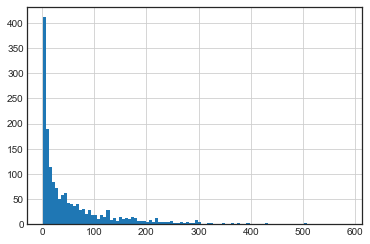

In [44]:
avaliacoes_usuarios['numero_avaliacoes'].hist(bins=100)

### Relação entre a classificação média e o número real de classificações
### Quanto maior o número de classificações, mais provável é que a classificação de um filme seja escolhido

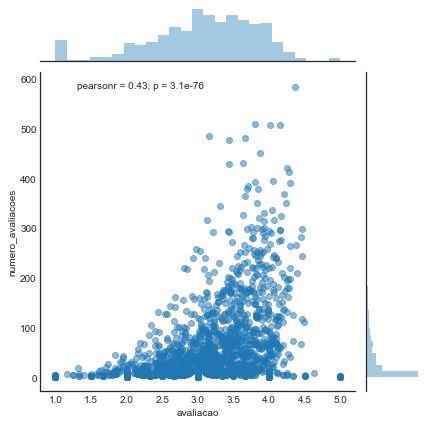

In [51]:
sn.jointplot(x='avaliacao', y='numero_avaliacoes', data=avaliacoes_usuarios, alpha=0.5)

# Recomendando filmes semelhantes
Vamos criar uma matriz que tenha os ID do usuário em um acesso e o título do filme em outro eixo. Cada célula irá consistir na classificação que o usuário deu a esse filme. Os valores de NaN são devidos à maioria das pessoas que não viram a maioria dos filmes. 

In [52]:
matriz_filme = avaliacoes.pivot_table(index='usuario_id',columns='titulo',values='avaliacao')
matriz_filme.head()

titulo,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Ã kÃ¶ldum klaka (Cold Fever) (1994)
usuario_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filme mais avaliado 

In [55]:
avaliacoes_usuarios.sort_values('numero_avaliacoes',ascending=False).head(20)

,avaliacao,numero_avaliacoes
titulo,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


#### Vamos escolher dois filmes para o nosso sistema: Starwars, um filme de ficção científica. E Liar Mentiroso, uma comédia.
#### Quais são as classificações de usuários para esses dois filmes?

In [58]:
usuario_avaliacao_starWars = matriz_filme['Star Wars (1977)']
usuario_avaliacao_liar_liar = matriz_filme['Liar Liar (1997)']

In [61]:
usuario_avaliacao_starWars.head(20)

usuario_id
0     5.0
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
11    NaN
12    4.0
13    5.0
14    5.0
15    5.0
16    NaN
17    NaN
18    4.0
19    NaN
Name: Star Wars (1977), dtype: float64

#### Correlação de qualquer outro filme com esse comportamento de usuário específico no filme StarWars

In [62]:
similar_a_starWars = matriz_filme.corrwith(usuario_avaliacao_starWars)
similar_a_starWars.head(20)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


titulo
'Til There Was You (1997)                      0.872872
1-900 (1994)                                  -0.645497
101 Dalmatians (1996)                          0.211132
12 Angry Men (1957)                            0.184289
187 (1997)                                     0.027398
2 Days in the Valley (1996)                    0.066654
20,000 Leagues Under the Sea (1954)            0.289768
2001: A Space Odyssey (1968)                   0.230884
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.106453
8 1/2 (1963)                                  -0.142977
8 Heads in a Duffel Bag (1997)                -0.577350
8 Seconds (1994)                              -0.755929
A Chef in Love (1996)                          0.868599
Above the Rim (1994)                          -0.645497
Absolute Power (1997)                          0.085440
Abyss, The (1989)                              0.203709
Ace Ventura: Pet Detective (1994)        

In [63]:
similar_a_liarLiar = matriz_filme.corrwith(usuario_avaliacao_liar_liar)
similar_a_liarLiar.head(20)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


titulo
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
39 Steps, The (1935)                           0.400918
8 1/2 (1963)                                   0.178064
8 Heads in a Duffel Bag (1997)                      NaN
8 Seconds (1994)                                    NaN
A Chef in Love (1996)                          0.000000
Above the Rim (1994)                           0.422577
Absolute Power (1997)                          0.240303
Abyss, The (1989)                              0.245412
Ace Ventura: Pet Detective (1994)        

### Removendo os valores de NaN e usando um DF em vez de Series

In [64]:
corre_starwars = pd.DataFrame(similar_a_starWars, columns=['Correlacao'])
corre_starwars.dropna(inplace=True)

In [65]:
corre_starwars.head(20)

,Correlacao
titulo,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


## Filmes perfeitamente correlacionados com Star Wars?
### muito provável que estes filmes tenham sido vistos apenas por uma pessoa que também avalia as Star Wars 5 estrelas 

In [68]:
corre_starwars.sort_values('Correlacao',ascending=False).head(20)

,Correlacao
titulo,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


### Definindo um limite para o número de classificações necessárias e filtre filmes que têm menos de um certo número de avaliações
#### juntando à coluna "número de classificações" no quadro de dados

In [69]:
corre_starwars = corre_starwars.join(avaliacoes_usuarios['numero_avaliacoes'],how='left', lsuffix='_left',rsuffix='_right')
corre_starwars.head()

,Correlacao,numero_avaliacoes
titulo,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


### Filtra filmes com menos de 100 avaliações (esse valor foi escolhido com base no histograma de classificações anterior)


In [70]:
corre_starwars[corre_starwars['numero_avaliacoes']>100].sort_values('Correlacao',ascending=False).head(20)

,Correlacao,numero_avaliacoes
titulo,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115
